# Подключение библиотек

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import *

# Enable inline plots
%matplotlib inline

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<ipython-input-1-4af1a216e6c4>:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


# Загружаем датасет

In [2]:
wine = load_wine()

In [3]:
# Наименование признаков 
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
# Значения целевого признака
np.unique(wine.target)

array([0, 1, 2])

In [5]:
# Наименования значений целевого признака
wine.target_names


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
list(zip(np.unique(wine.target),wine.target_names))

[(0, 'class_0'), (1, 'class_1'), (2, 'class_2')]

In [7]:
# Значения целевого признака
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
# Размер выборки
wine.data.shape, wine.target.shape

((178, 13), (178,))

In [9]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [10]:
# Сформируем DataFrame
wine_df = make_dataframe(load_wine)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [11]:
# Выведем его статистические характеристики
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [12]:
# Наличие пропусков в датасете:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

# Разделение данных

In [13]:
X, y =  load_wine( return_X_y= True) 
X_train,  X_test,  y_train,  y_test =  train_test_split( X,  y, test_size = 0.15,  random_state = 1 )

In [14]:
# Размер обучающей и тестовой выборки
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(151, 13)
(27, 13)
(151,)
(27,)


# Первичное обучение модели и оценка качества

In [15]:
cl1_1 = KNeighborsClassifier(n_neighbors=50)
cl1_1.fit(X_train, y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.7350993377483444, 0.6666666666666666)

In [16]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
f1_score(y_test, target1_1, average='micro')

0.6666666666666666

In [17]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
f1_score(y_test, target1_1, average='macro')

0.6428571428571429

In [18]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
f1_score(y_test, target1_1, average='weighted')

0.6804232804232804

# Оценка качества модели с использованием кросс-валидации

In [19]:
# LeaveOneOut стратегия (в тестовую выборку помещается всего один элемент)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=50), 
                         X, y, cv=LeaveOneOut())
scores, np.mean(scores)

(array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
        1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 1.]),
 0.7078651685393258)

In [20]:
# Использование метрики f1
scores = cross_val_score(KNeighborsClassifier(n_neighbors=50), 
                         X, y, cv=5)
scores, np.mean(scores)

(array([0.72222222, 0.66666667, 0.66666667, 0.77142857, 0.8       ]),
 0.7253968253968253)

# Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации

In [21]:
n_range = np.array(range(2,100,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
         36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
         70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])}]

In [22]:
%%time
gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=7, scoring='accuracy')
gs.fit(X, y)

CPU times: user 786 ms, sys: 8.21 ms, total: 794 ms
Wall time: 798 ms


GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])}],
             scoring='accuracy')

In [23]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=32)

In [24]:
gs.best_params_

{'n_neighbors': 32}

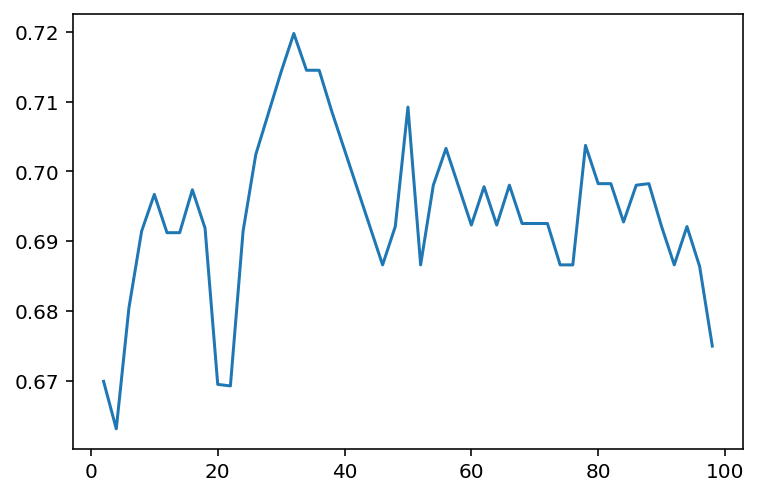

In [25]:
plt.plot(n_range, gs.cv_results_["mean_test_score"]);

# Обучение модели и оценка качества с учетом подобранных гиперпараметров

In [26]:
gs.best_estimator_.fit(X_train, y_train)
target2_0 = gs.best_estimator_.predict(X_train)
target2_1 = gs.best_estimator_.predict(X_test)

In [27]:
# Новое качество модели
accuracy_score(y_train, target2_0), accuracy_score(y_test, target2_1)

(0.7417218543046358, 0.7037037037037037)

In [28]:
# Качество модели до подбора гиперпараметров
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.7350993377483444, 0.6666666666666666)